<a href="https://colab.research.google.com/github/dauvanduc/AI/blob/main/btvn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
#doc dia chi hinh anh
import os
#xu ly ve hinh anh
from PIL import Image

In [ ]:
#khai bien doc dia chi
train_data ='drive/MyDrive/face_id/bt_1/train'
test_data='drive/MyDrive/face_id/bt_1/test'
validation_data='drive/MyDrive/face_id/bt_1/validation'

In [ ]:
listdata_train=[]
listdata_test=[]
listdata_validation=[]
dict={'duc':[1],'dat':[0]}

In [ ]:
def Getdata(dirdata,lstdata):
#doc hinh anh trong tap du lieu
  for whatever in os.listdir(dirdata):
      whatever_path = os.path.join(dirdata,whatever)
      lst_filename_path=[]
      for filename in os.listdir(whatever_path):
        filename_path=os.path.join(whatever_path,filename)
        label=filename_path.split('/')[5]
        img = np.array(Image.open(filename_path))
        lst_filename_path.append((img,dict[label]))
      lstdata.extend(lst_filename_path)
  for i in range(3):
      np.random.shuffle(lstdata)
  return lstdata

In [ ]:
listdata_train=Getdata(train_data,listdata_train)
listdata_test=Getdata(test_data,listdata_test)
listdata_validation=Getdata(validation_data,listdata_validation)

In [ ]:
x_train=np.array([x[0] for _ ,x in enumerate(listdata_train)])
y_train=np.array([y[1] for _ ,y in enumerate(listdata_train)])
y_train.shape

(70, 1)

In [ ]:
x_test=np.array([x[0] for _ ,x in enumerate(listdata_test)])
y_test=np.array([y[1] for _ ,y in enumerate(listdata_test)])

In [ ]:
x_validation=np.array([x[0] for _ ,x in enumerate(listdata_validation)])
y_validation=np.array([y[1] for _ ,y in enumerate(listdata_validation)])
x_validation.shape

(2, 150, 150, 3)

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import categorical_crossentropy

In [ ]:
yname=y_train.flatten()

In [ ]:
class_names=['dat','duc']
x_pre=x_test
y_pre=y_test
y_pre

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1]])

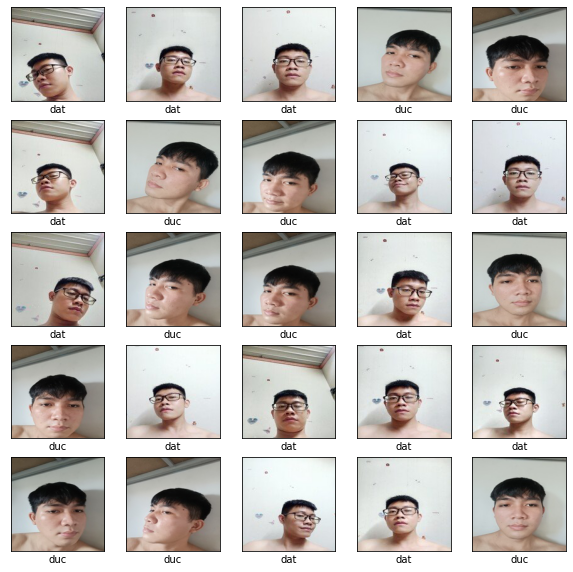

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(class_names[yname[i]])
plt.show()

In [ ]:
x_train.shape



(70, 150, 150, 3)

In [ ]:
x_validation.shape

(2, 150, 150, 3)

In [ ]:
x_test.shape



(60, 150, 150, 3)

In [ ]:
from keras.utils import np_utils
x_train=x_train.reshape(70,67500)
x_test=x_test.reshape(60,67500)
x_validation=x_validation.reshape(2,67500)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_validation=x_validation.astype('float32')
x_train/=255
x_test/=255
x_validation/=255
y_train=np_utils.to_categorical(y_train,2)
y_test= np_utils.to_categorical(y_test,2)
y_validation= np_utils.to_categorical(y_validation,2)

In [ ]:
model=Sequential()
model.add(Dense(1000,activation='relu',input_shape=(67500,)))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              67501000  
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 68,504,002
Trainable params: 68,504,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=90,epochs=200,verbose=1,validation_data=(x_validation,y_validation),callbacks=[EarlyStopping(monitor='val_loss',patience = 30)]) #epochs số lần học

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.7282 - accuracy: 0.4571 - val_loss: 144.7384 - val_accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 1s 870ms/step - loss: 108.5342 - accuracy: 0.5714 - val_loss: 2699.6289 - val_accuracy: 0.5000
Epoch 3/200
1/1 [==============================] - 1s 817ms/step - loss: 3024.4060 - accuracy: 0.4286 - val_loss: 411.1983 - val_accuracy: 0.5000
Epoch 4/200
1/1 [==============================] - 1s 896ms/step - loss: 448.7116 - accuracy: 0.4286 - val_loss: 85.0433 - val_accuracy: 0.5000
Epoch 5/200
1/1 [==============================] - 1s 818ms/step - loss: 55.8319 - accuracy: 0.5714 - val_loss: 104.1009 - val_accuracy: 0.5000
Epoch 6/200
1/1 [==============================] - 1s 796ms/step - loss: 112.6470 - accuracy: 0.4286 - val_loss: 105.1883 - val_accuracy: 0.5000
Epoch 7/200
1/1 [==============================] - 1s 810ms/step - loss: 78.3198 - accuracy: 0.5714 - val_loss: 0.0000e+00 - val_accura

In [ ]:
Score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 0.4822724759578705
Test accuary 0.8999999761581421


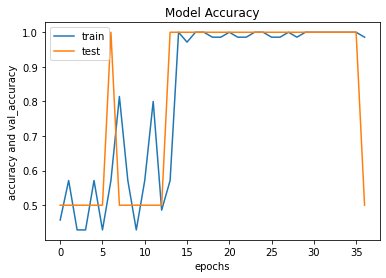

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy and val_accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'])
plt.show()

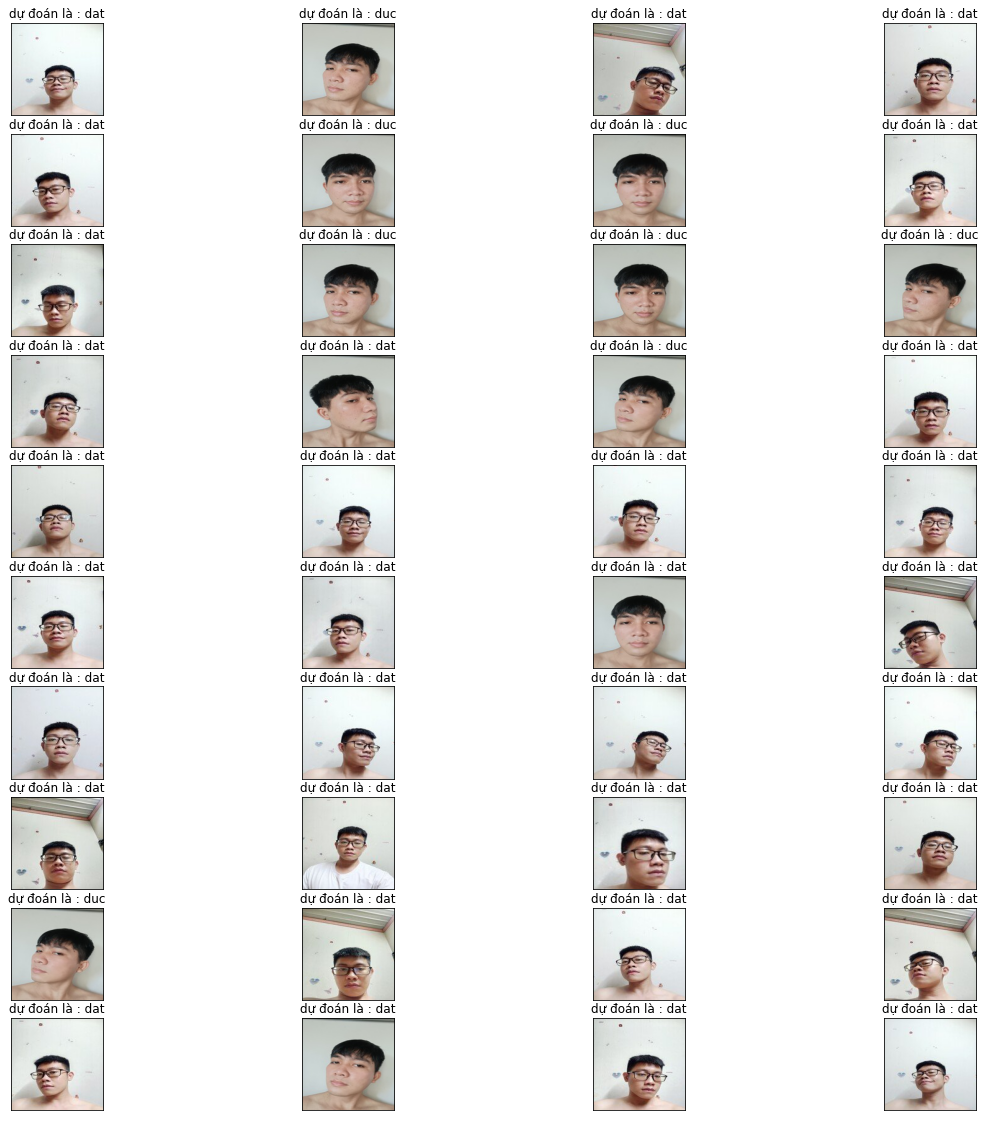

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(40):
    plt.subplot(10, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_pre[i], cmap='binary')
    plt.title("dự đoán là : " + str(class_names[np.argmax(model.predict(x_pre[i].reshape((-1,67500))))]))
plt.show()